Importing necessary Libraries

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

Collecting data from yfinance

In [36]:
infosys = yf.Ticker("AAPL")
infosys.history(start='2024-01-01', end='2024-12-13',interval="1h", actions=False)

,Open,High,Low,Close,Volume
Datetime,,,,,
2024-01-02 09:30:00-05:00,187.800995,188.440002,186.009995,186.189896,21173291
2024-01-02 10:30:00-05:00,186.179993,186.904999,185.184296,186.804993,9010595
2024-01-02 11:30:00-05:00,186.800003,187.350006,186.570007,186.615005,6143754
2024-01-02 12:30:00-05:00,186.615005,187.039993,185.259995,185.294998,5381701
2024-01-02 13:30:00-05:00,185.289993,185.539993,184.229996,184.494995,7228643
...,...,...,...,...,...
2024-12-12 11:30:00-05:00,248.479996,248.549896,247.990005,248.092804,2067122
2024-12-12 12:30:00-05:00,248.089996,248.740005,247.639999,248.529999,2027236
2024-12-12 13:30:00-05:00,248.520004,248.740005,248.000000,248.020004,1974147


In [43]:
## EDA
df=infosys.history(start='2024-01-01', end='2024-12-13',interval="1h", actions=False)
print(df.shape)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print("number of null values in each column", df.isnull().sum())
print("number of NaN values in each column", df.isna().sum())

(1672, 5)
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-01-02 09:30:00-05:00  187.800995  188.440002  186.009995  186.189896   
2024-01-02 10:30:00-05:00  186.179993  186.904999  185.184296  186.804993   
2024-01-02 11:30:00-05:00  186.800003  187.350006  186.570007  186.615005   
2024-01-02 12:30:00-05:00  186.615005  187.039993  185.259995  185.294998   
2024-01-02 13:30:00-05:00  185.289993  185.539993  184.229996  184.494995   

                             Volume  
Datetime                             
2024-01-02 09:30:00-05:00  21173291  
2024-01-02 10:30:00-05:00   9010595  
2024-01-02 11:30:00-05:00   6143754  
2024-01-02 12:30:00-05:00   5381701  
2024-01-02 13:30:00-05:00   7228643  
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-12-12 11:30:00-05:00  248

In [44]:
df.to_csv("infosys.csv", index=True, index_label="Datetime")


In [45]:
df.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2024-01-02 09:30:00-05:00,187.800995,188.440002,186.009995,186.189896,21173291
2024-01-02 10:30:00-05:00,186.179993,186.904999,185.184296,186.804993,9010595
2024-01-02 11:30:00-05:00,186.800003,187.350006,186.570007,186.615005,6143754
2024-01-02 12:30:00-05:00,186.615005,187.039993,185.259995,185.294998,5381701
2024-01-02 13:30:00-05:00,185.289993,185.539993,184.229996,184.494995,7228643


In [46]:
# taking only the close column
data = df[['Close']]
print(data.head())

                                Close
Datetime                             
2024-01-02 09:30:00-05:00  186.189896
2024-01-02 10:30:00-05:00  186.804993
2024-01-02 11:30:00-05:00  186.615005
2024-01-02 12:30:00-05:00  185.294998
2024-01-02 13:30:00-05:00  184.494995


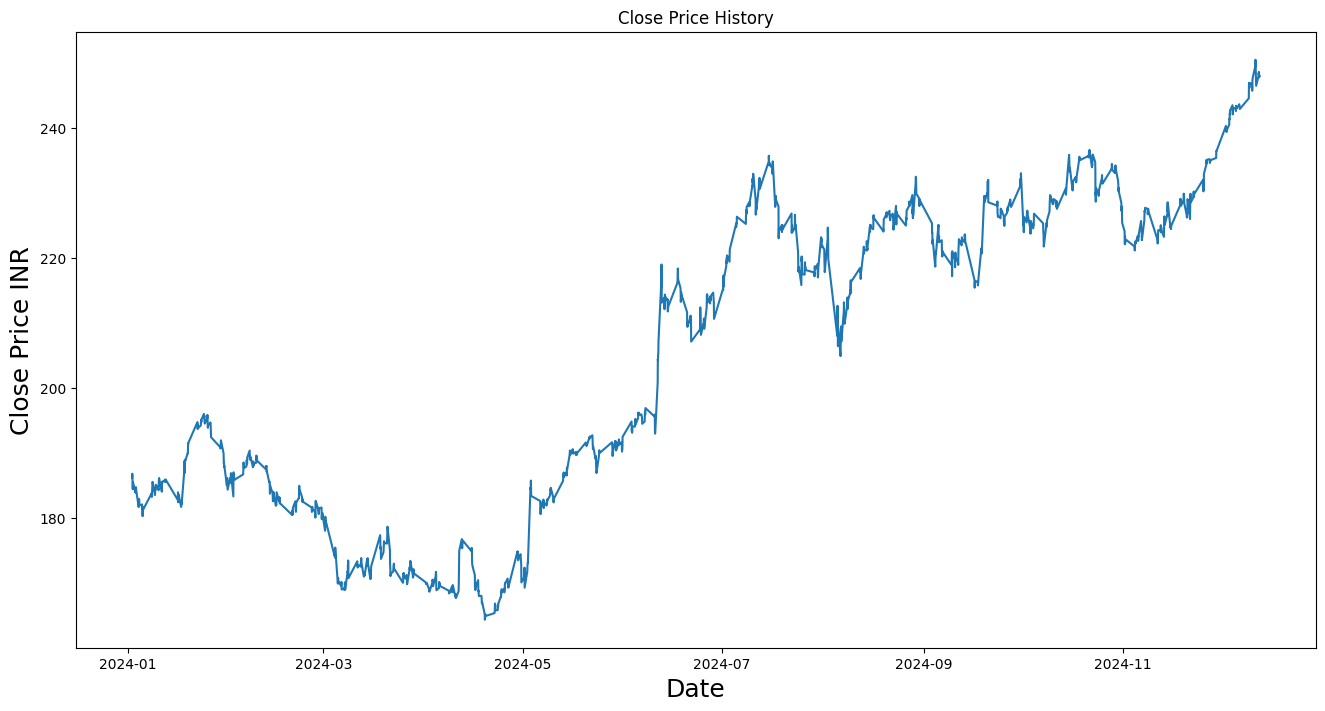

In [47]:
# plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [49]:
class DataLoader():


    def __init__(self, filename,cols):
        dataframe = pd.read_csv(filename)
        self.data_train = dataframe.get(cols).values
        self.len_train  = len(self.data_train)
        self.len_train_windows = None

    def get_data(self, seq_len, normalise):
        '''
        Create x, y train data windows
        Warning: batch method, not generative, make sure you have enough memory to
        load data, otherwise use generate_training_window() method.
        '''
        data_x = []
        data_y = []
        for i in range(self.len_train - seq_len):
            x, y = self._next_window(i, seq_len, normalise)
            data_x.append(x)
            data_y.append(y)
        return np.array(data_x), np.array(data_y)

    def generate_train_batch(self, seq_len, batch_size, normalise):
        '''Yield a generator of training data from filename on given list of cols split for train/test'''
        i = 0
        while i < (self.len_train - seq_len):
            x_batch = []
            y_batch = []
            for b in range(batch_size):
                if i >= (self.len_train - seq_len):
                    # stop-condition for a smaller final batch if data doesn't divide evenly
                    yield np.array(x_batch), np.array(y_batch)
                    i = 0
                x, y = self._next_window(i, seq_len, normalise)
                x_batch.append(x)
                y_batch.append(y)
                i += 1
            yield np.array(x_batch), np.array(y_batch)

    def _next_window(self, i, seq_len, normalise):
        '''Generates the next data window from the given index location i'''
        window = self.data_train[i:i+seq_len]
        window = self.normalise_windows(window, single_window=True)[0] if normalise else window
        x = window[:-1]
        y = window[-1, [0]]
        return x, y

    def normalise_windows(self, window_data, single_window=False):
        '''Normalise window with a base value of zero'''
        normalised_data = []
        window_data = [window_data] if single_window else window_data
        for window in window_data:
            normalised_window = []
            for col_i in range(window.shape[1]):
                normalised_col = [((float(p) / float(window[0, col_i])) - 1) for p in window[:, col_i]]
                normalised_window.append(normalised_col)
            normalised_window = np.array(normalised_window).T # reshape and transpose array back into original multidimensional format
            normalised_data.append(normalised_window)
        return np.array(normalised_data)

In [50]:
data = DataLoader(
        "infosys.csv",
        ["Close","Volume"]
    )

x, y = data.get_data(
        seq_len=20,
        normalise=True
    )

ZeroDivisionError: float division by zero

In [14]:
x_train = x[:-170]
x_test = x[-170:]
y_train = y[:-170]
y_test = y[-170:]

In [23]:
pip install attention

In [24]:
from attention import Attention
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Dropout, LSTM,Bidirectional
from numpy import newaxis

model = Sequential([
      Bidirectional(LSTM(units=100,input_shape=(None, 2), return_sequences=True)),
      #LSTM(units=100,input_shape=(19, 2), return_sequences=True),
      Dropout(0.2),
      LSTM(units=10,return_sequences=True),
      #LSTM(units=50,return_sequences=True),
      Dropout(0.2),
      #Attention(),
      Dense(1, activation='linear')
])
model.compile(loss='mse', optimizer='adam')

model.fit(x_train, y_train, epochs=39,
              batch_size=32)

Epoch 1/39


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Input 0 of layer "bidirectional" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (32,)

In [25]:
from attention import Attention
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Dropout, LSTM,Bidirectional
from numpy import newaxis

model = Sequential([
      #Bidirectional(LSTM(units=100,input_shape=(None, 2), return_sequences=True)),
      LSTM(units=100,input_shape=(19, 2), return_sequences=True),
      Dropout(0.2),
      LSTM(units=10,return_sequences=True),
      #LSTM(units=50,return_sequences=True),
      Dropout(0.2),
      Attention(),
      Dense(1, activation='linear')
])
model.compile(loss='mse', optimizer='adam')

model.fit(x_train, y_train, epochs=7,
              batch_size=32)

Epoch 1/7


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32,), dtype=float32). Expected shape (None, 19, 2), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [26]:
def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

In [16]:
def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

visualistion

In [28]:
pip install lstm

In [29]:
import lstm
import time
import matplotlib.pyplot as plt

def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()


In [30]:
predicted = predict_point_by_point(model, x)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


ValueError: math domain error

In [31]:
plt.rcParams["figure.figsize"] = [30,10]
plot_results(predicted, y)

NameError: name 'predicted' is not defined

In [32]:

model = Sequential([
      #Bidirectional(LSTM(units=100,input_shape=(None, 2), return_sequences=True)),
      LSTM(units=100,input_shape=(19, 2), return_sequences=True),
      Dropout(0.2),
      LSTM(units=70,return_sequences=True),
      #LSTM(units=50,return_sequences=True),
      Dropout(0.2),
      Attention(),
      Dense(1, activation='linear')
])
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=1,
              batch_size=6)
predictions = predict_sequences_multiple(model,x_test,12, 10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(6,), dtype=float32). Expected shape (None, 19, 2), but input has incompatible shape (6,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(6,), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

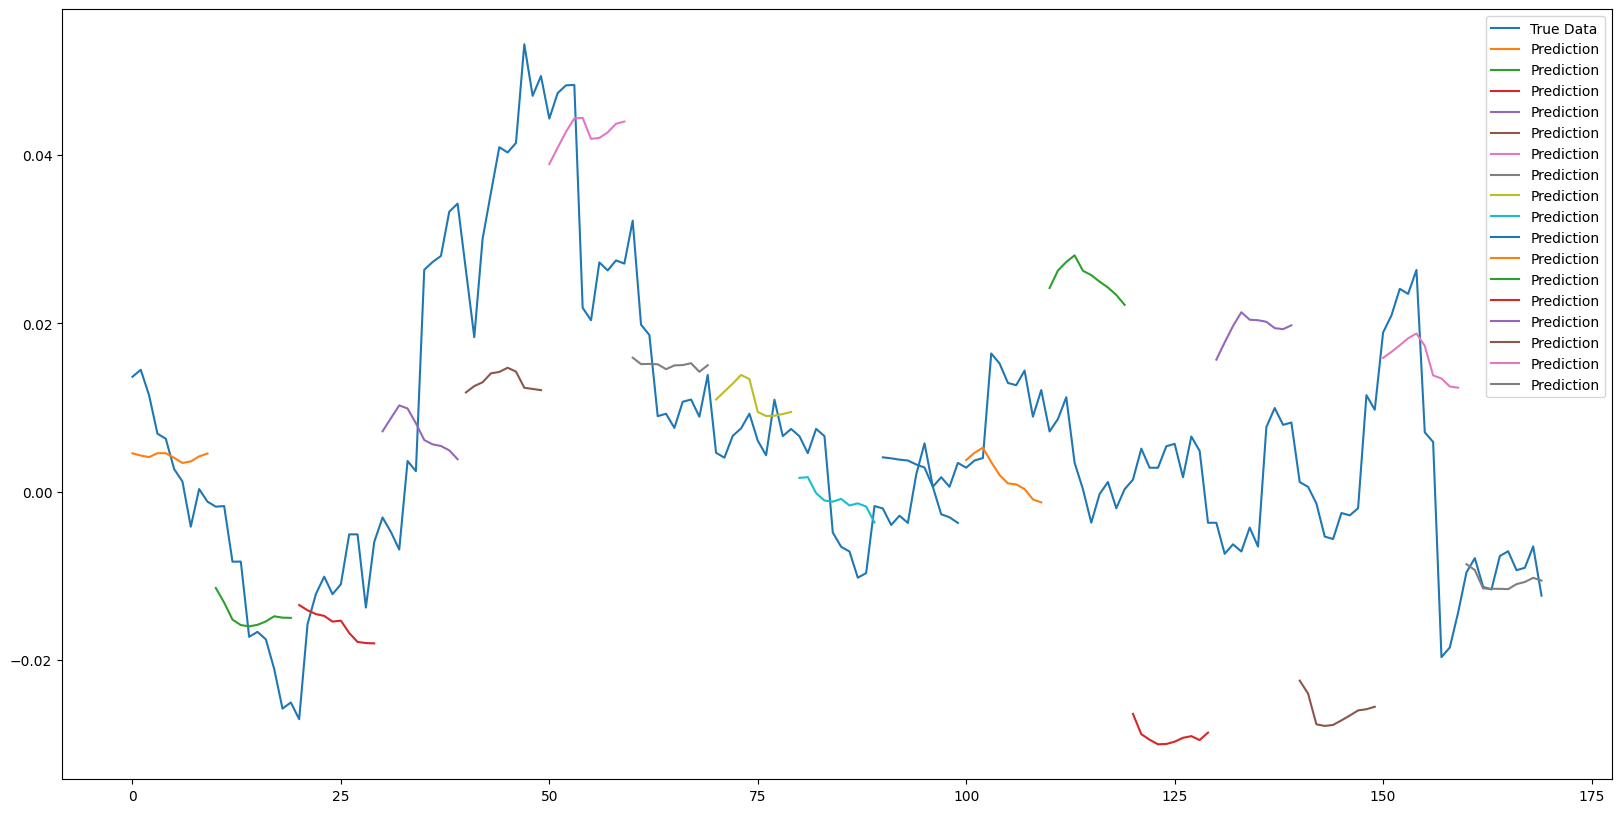

In [ ]:
plt.rcParams["figure.figsize"] = [20,10]
plot_results_multiple(predictions, y_test,10)

trading stratedy with point by point

In [ ]:
from backtesting import Strategy
from backtesting import Backtest
from backtesting.lib import crossover
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from attention import Attention

def mean(values, n):
    """
    Return simple moving average of `values`, at
    each step taking into account `n` previous values.
    """
    return pd.Series(values).rolling(n).mean()

class LstmPredictStrategy(Strategy):
    n1=1
    def init(self):
        # Define any required variables or parameters here
        self.seq_len = 20
        self.window_size = 19
        self.prediction_len = 1
        ;# Changed to predict 1 point at a time
        self.model = self.build_model()
        self.x = self.I(mean, self.data.Close, self.n1)

    def build_model(self):
        # Define your LSTM model here
        model = Sequential([
            LSTM(units=100, input_shape=(self.window_size, 2), return_sequences=True),
            Dropout(0.2),
            LSTM(units=10, return_sequences=True),
            Dropout(0.2),
            Attention(),
            Dense(1, activation='linear')
        ])
        model.compile(loss='mse', optimizer='adam')
        return model

    def train_model(self):


        # Train the model
        self.model.fit(self.data.Close, epochs=7, batch_size=32, verbose=0)

    def next(self):
        # Define the logic for making trading decisions
         # Precompute the two moving averages

        prediction = self.predict_point_by_point(x)
        if prediction > 0:  # Assuming the prediction is the next price change
            self.buy()
        elif prediction < 0:
            self.sell()

    def predict_point_by_point(self, data):
        #Predict the next timestep given the last sequence of true data
        predicted = self.model.predict(data)
        predicted = np.reshape(predicted, (predicted.size,))
        return predicted[-1]  # Return the last prediction for the next timestep


In [3]:
pip install backtesting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 10.3 MB/s eta 0:00:00


In [52]:
from backtesting import Strategy, Backtest
from backtesting.lib import crossover
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler


class LstmPredictStrategy(Strategy):
    def init(self):
        self.seq_len = 20
        self.prediction_len = 1
        self.scaler = MinMaxScaler()

        # Use Close and Volume as features example (expand as needed)
        # Access data directly from self.data provided by backtesting
        data_features = pd.DataFrame({
            'Close': self.data.Close,
            'Volume': self.data.Volume
        }).values.astype(float)


        # Normalize features
        self.scaled_data = self.scaler.fit_transform(data_features)

        # Create training windows and labels
        self.train_X, self.train_y = self.create_windows(self.scaled_data)

        # Build and train model once
        self.model = self.build_model()
        self.model.fit(self.train_X, self.train_y, epochs=20, batch_size=32, validation_split=0.1, shuffle=False, verbose=0)

    def create_windows(self, data):
        X, y = [], []
        for i in range(len(data) - self.seq_len):
            X.append(data[i:i + self.seq_len - 1])     # sequence length = seq_len-1 for inputs
            y.append(data[i + self.seq_len - 1][0])    # predict Close price next
        return np.array(X), np.array(y)

    def build_model(self):
        n_features = self.scaled_data.shape[1]
        model = Sequential([
            LSTM(50, input_shape=(self.seq_len - 1, n_features), return_sequences=False),
            Dropout(0.2),
            Dense(1, activation='linear')
        ])
        model.compile(loss='mse', optimizer='adam')
        return model

    def next(self):
        # Prepare latest input window for prediction
        data = self.scaled_data[-(self.seq_len - 1):]
        data = data.reshape((1, self.seq_len - 1, self.scaled_data.shape[1]))

        pred_scaled = self.model.predict(data, verbose=0)[0,0]
        # Inverse scale predicted close price
        last_close_scaled = self.scaled_data[-1][0]
        close_min = self.scaler.data_min_[0]
        close_max = self.scaler.data_max_[0]
        pred_price = pred_scaled * (close_max - close_min) + close_min

        current_price = self.data.Close[-1]

        # Simple trading logic: buy if predicted price > current, sell if less
        if pred_price > current_price:
            self.buy()
        elif pred_price < current_price:
            self.sell()


# Example usage (assuming df is your OHLCV DataFrame):
# from backtesting import Backtest
# bt = Backtest(df, LstmPredictStrategy, cash=10000, commission=.002)
# stats = bt.run()
# print(stats)
# bt.plot()

In [56]:
from backtesting import Strategy
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.layers import Layer
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras.backend as K
import tensorflow as tf
import logging

# Simple Attention Layer Implementation
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[1], 1),
                                 initializer='zeros', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

class LstmPredictStrategy(Strategy):
    def init(self):
        self.seq_len = 20
        self.prediction_len = 1
        self.scaler = MinMaxScaler()

        data_features = pd.DataFrame({
            'Close': self.data.Close,
            'Volume': self.data.Volume
        }).values.astype(float)

        self.scaled_data = self.scaler.fit_transform(data_features)
        self.train_X, self.train_y = self.create_windows(self.scaled_data)

        self.model = self.build_model()
        self.model.fit(self.train_X, self.train_y,
                       epochs=20, batch_size=32,
                       validation_split=0.1, shuffle=False, verbose=0)

        logging.basicConfig(level=logging.INFO)

    def create_windows(self, data):
        X, y = [], []
        for i in range(len(data) - self.seq_len):
            X.append(data[i:i+self.seq_len-1])
            y.append(data[i+self.seq_len-1][0])  # predict Close price next
        return np.array(X), np.array(y)

    def build_model(self):
        n_features = self.scaled_data.shape[1]
        model = Sequential([
            LSTM(50, input_shape=(self.seq_len - 1, n_features), return_sequences=True),
            Dropout(0.2),
            Attention(),
            Dense(1, activation='linear')
        ])
        model.compile(loss='mse', optimizer='adam')
        return model

    def next(self):
        data = self.scaled_data[-(self.seq_len-1):]
        data = data.reshape((1, self.seq_len - 1, self.scaled_data.shape[1]))

        pred_scaled = self.model.predict(data, verbose=0)[0, 0]
        close_min = self.scaler.data_min_[0]
        close_max = self.scaler.data_max_[0]
        pred_price = pred_scaled * (close_max - close_min) + close_min

        current_price = self.data.Close[-1]
        predicted_return = pred_price - current_price
        threshold = 0.001 * current_price  # 0.1% threshold to avoid noise

        if predicted_return > threshold:
            logging.info(f"Buy signal: predicted {pred_price:.4f} > current {current_price:.4f}")
            self.buy(size=1)
        elif predicted_return < -threshold:
            logging.info(f"Sell signal: predicted {pred_price:.4f} < current {current_price:.4f}")
            self.sell(size=1)
        else:
            logging.info(f"No trade: predicted {pred_price:.4f} close to current {current_price:.4f}")


In [57]:

bt = Backtest(df, LstmPredictStrategy, cash=10000, commission=.002)
stats = bt.run()

stats


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Backtest.run:   0%|          | 0/1671 [00:00<?, ?bar/s]

/tmp/ipython-input-1585612169.py:2: UserWarning: Some trades remain open at the end of backtest. Use `Backtest(..., finalize_trades=True)` to close them and include them in stats.
  stats = bt.run()


,0
Start,2024-01-02 09:30:00-05:00
End,2024-12-12 15:30:00-05:00
Duration,345 days 06:00:00
Exposure Time [%],99.880383
Equity Final [$],13427.391164
Equity Peak [$],13535.412088
Commissions [$],20.701426
Return [%],34.273912
Buy & Hold Return [%],33.17049
Return (Ann.) [%],36.293573


In [58]:
bt.plot()

/tmp/ipython-input-651457420.py:1: UserWarning: Superimposed OHLC plot matches the original plot. Skipping.
  bt.plot()


/usr/local/lib/python3.12/dist-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


GridPlot(id='p1307', ...)

Trading Strategy with multiple point

In [ ]:
import numpy as np
import pandas as pd
from typing import Union

_Array = Union[np.ndarray, pd.Series]

class _Data:
    def __init__(self, df):
        self.df = df
        self.__arrays = {c: df[c].values for c in df.columns}
        self.__i = len(df)
        self.__cache = {}

    def __getitem__(self, item):
        return self.__get_array(item)

    def __get_array(self, key) -> _Array:
      if isinstance(key, slice):
        start, stop, step = key.start, key.stop, key.step
        if start is None:
            start = 0
        if stop is None:
            stop = len(self.__arrays)
        if step is None:
            step = 1
        return np.concatenate([self.__arrays[i] for i in range(start, stop, step)])

      if key not in self.__arrays:
        raise KeyError(f"Column '{key}' not found in data")

      arr = self.__cache.get(key)
      if arr is None:
        arr = cast(_Array, self.__arrays[key][:self.__i])
        self.__cache[key] = arr
      return arr




In [ ]:
from backtesting import Strategy
from backtesting.lib import crossover
import pandas as pd

class LstmPredictStrategy(Strategy):
    def init(self):
        # Define any required variables or parameters here
        self.seq_len = 20
        self.window_size = 19
        self.prediction_len = 12
        self.model = self.build_model()
        self.train_model()

    def build_model(self):
        # Define your LSTM model here
        model = Sequential([
            LSTM(units=100, input_shape=(self.window_size, 2), return_sequences=True),
            Dropout(0.2),
            LSTM(units=70, return_sequences=True),
            Dropout(0.2),
            Attention(),
            Dense(1, activation='linear')
        ])
        model.compile(loss='mse', optimizer='adam')
        return model

    def train_model(self):
        # Train your model here

        x, y = self.get_data()
        x_train = x[:-170]
        x_test = x[-170:]
        y_train = y[:-170]
        y_test = y[-170:]
        self.model.fit(x_train, y_train, epochs=1, batch_size=6)

    def get_data(self):
        # Prepare your data for training here
        data_x = []
        data_y = []
        for i in range(len(self.data) - self.seq_len):
            x, y = self._next_window(i)
            data_x.append(x)
            data_y.append(y)
        return np.array(data_x), np.array(data_y)

    def _next_window(self, i):
    # Define how each window of data is processed
       # window = self.data.iloc[i:i+self.seq_len].values.tolist()
        self.data.drop(self, labels='Datetime', axis=1,inplace=True)

        window = self.data[i:i+self.seq_len].values.tolist()
        window = self.normalise_windows(window, single_window=True)[0]
        x = window[:-1]
        y = window[-1][0]  # Assuming you want the first column value as y
        return x, y




    def normalise_windows(self, window_data, single_window=False):
        # Define how data is normalised
        normalised_data = []
        window_data = [window_data] if single_window else window_data
        for window in window_data:
            normalised_window = []
            for col_i in range(window.shape[1]):
                normalised_col = [((float(p) / float(window[0, col_i])) - 1) for p in window[:, col_i]]
                normalised_window.append(normalised_col)
            normalised_window = np.array(normalised_window).T
            normalised_data.append(normalised_window)
        return np.array(normalised_data)

    def next(self):
        # Define the logic for making trading decisions
        x = self.data[-self.seq_len:]
        prediction = self.predict_sequences_multiple(x)
        if prediction[-1][-1] > 0:  # Assuming the last prediction in the sequence is the future prediction
            self.buy()
        elif prediction[-1][-1] < 0:
            self.sell()

    def predict_sequences_multiple(self, data):
        # Define how predictions are made
        prediction_seqs = []
        for i in range(int(len(data) / self.prediction_len)):
            curr_frame = data[i * self.prediction_len]
            predicted = []
            for j in range(self.prediction_len):
                predicted.append(self.model.predict(curr_frame[np.newaxis, :, :])[0, 0])
                curr_frame = curr_frame[1:]
                curr_frame = np.insert(curr_frame, [self.window_size - 1], predicted[-1], axis=0)
            prediction_seqs.append(predicted)
        return prediction_seqs


In [ ]:
from backtesting import Backtest

bt = Backtest(df, LstmPredictStrategy, cash=10_000, commission=.002)
stats = bt.run()
stats

backtesting for infosys :

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10)
        self.ma2 = self.I(SMA, price, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()


bt = Backtest(df, SmaCross, commission=.002,
              exclusive_orders=True)
stats = bt.run()
bt.plot()
stats


In [1]:
can you help me get better results after backtesting?


Object `backtesting` not found.
